Danny Abraham
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 8</h2></center>

In [1]:
import numpy as np
from numpy import linalg as la
from scipy.optimize import linprog as lp
import matplotlib.pyplot as plt
import cvxpy as cvx
import sympy as sp
import quadprog as qp

## Problem in $R$
---

In [2]:
def f(x):
    return x**2+1

In [3]:
def g(x):
    return (6*x/(2+2*x))**2 + 1 + x*(6*x/(2+2*x)-2)*(6*x/(2+2*x)-4)

$$ \min \; x^2 + 1 $$

$$ subject \; to (x - 2)(x - 4) \leq 0 $$

#### Lagrangian

$$ L(x,\lambda) = x^2+1+\lambda(x-2)(x-4)$$ 

$$\nabla L_x = 0$$

$$ x = \frac{6\lambda}{2+2\lambda}$$

$$g(\lambda) = (\frac{6\lambda}{2+2\lambda})^2 +1 + \lambda(\frac{6\lambda}{2+2\lambda} -2)(\frac{6\lambda}{2+2\lambda}-4) $$

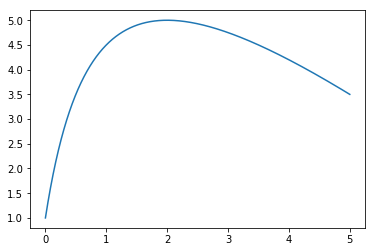

In [4]:
x = np.linspace(0,5,10000)
plt.plot(x,g(x))
plt.show()

In [5]:
x = cvx.Variable()
constraints = [
                -x<=-2,
                 x<= 4  
              ]
obj = cvx.Minimize(f(x))
prob = cvx.Problem(obj, constraints)
prob.solve()

5.000000000000002

In [6]:
x = sp.Symbol('x')

g_symb = [(6*x/(2+2*x))**2 + 1 + x*(6*x/(2+2*x)-2)*(6*x/(2+2*x)-4)]
g = sp.lambdify([x], g_symb, 'numpy')

derivative = sp.derive_by_array(g_symb, x)
g_div = sp.lambdify([x], derivative, 'numpy')

In [7]:
sp.solvers.solve(derivative)

[{x: -4}, {x: 2}]

In [8]:
g(2)

[5.0]

$$\lambda^* = 2$$

$$g^* = 5$$

$$f^* = 5$$

## Dual in $R^n$

$$ min \; p^tx$$

$$ subject\; to\qquad 0\leq x \leq 1$$

$$\qquad \qquad \; 1^tx = b $$

#### Lagragian

$$ L(x,\lambda,\nu) = p^tx - \lambda^t(x-1)-\lambda^t_2(x) - \nu(1^tx - b)$$

$$ L(x,\lambda,\nu) = (p^t-\lambda^t-\lambda^t_2-\nu 1^t)x + b \nu + \lambda^t1 $$

#### Dual Objective

$$ G(\lambda,\nu) = b \nu + \lambda^t1 $$
$$subject\; to \qquad p-\lambda-\lambda_2-\nu = 0 $$
$$ \qquad \qquad \lambda \geq 0$$

$$ G(\lambda,\nu) = b \nu + \lambda^t1 $$
$$subject\; to \qquad \lambda +\nu \leq p $$
$$ \qquad \qquad \lambda \geq 0$$

In [9]:
res = lp([1], A_eq=[[1]], b_eq =[1],bounds = [(0,1)], options={"disp": True})

The solution was determined in presolve as there are no non-trivial constraints.
         Current function value: 1.000000    
         Iterations: 0


In [10]:
res2 = lp([-1,-1], A_ub=[[1,1]], b_ub = [1], options={"disp": True})

Optimization terminated successfully.
         Current function value: -1.000000   
         Iterations: 1


We test out this equation in linprog with an example in which we have:
$b = 1$
$ p =1$
Since we are mnimizing $-G(\lambda,\nu)$ we can say that $ max\; G(\lambda, \nu) = 1$ thus, we have strong duality in this case since f* - g* = 0

## Dual of a Quadratic Problem
---

#### Primal Problem

$$ minimize \; x^tx $$

$$ subject\;to \qquad Ax = b $$

$$ \qquad \lambda \geq 0 $$

#### Lagrangian

$$ L(x,\lambda) = x^tx - \lambda^t(Ax - b) $$

$$ \frac{\partial\lambda}{\partial x} = 2x - A^t\lambda$$

$$ \therefore x = \frac{A^t\lambda}{2}$$

#### Dual Problem

$$ g(x,\lambda) = \frac{(A^t\lambda)^t(A^t\lambda)}{4}-\lambda^t(\frac{AA^t\lambda}{2}-b) $$

$$ g(x,\lambda) = -\frac{\lambda^tAA^t\lambda}{4}+\lambda^tb $$

$$ \lambda \gt 0 $$

## Piece-wise Linear Minimization
---

$$ \min t$$
$$ subject\; to\; \begin{bmatrix} A & -1 \end{bmatrix} \begin{bmatrix}x \\ t\end{bmatrix}\leq b$$

#### Lagrangian

$$L(x,\lambda,\nu) = t + \lambda^t(Ax -1t -b) $$

$$L(x,\lambda,\nu) = (1 - \lambda^t1)t +  \lambda^tAx  - \lambda^tb $$

$$ \nabla L_x = 0$$

$$ \frac{d}{dx}\lambda^tAx =A^t\lambda = 0 $$

$$ \frac{d}{dt}(t - \lambda^t1t) =  1 - 1^t\lambda = 0 $$

$$1^t\lambda = 1 $$

$$\lambda \geq 0 $$

#### Dual Objective
$$ \max -b^t\lambda$$

$$ subject\;to\; A^t\lambda =0$$
$$\qquad \qquad 1^t\lambda =1$$
$$\qquad \qquad \lambda \geq 0$$

#### KKT Conditions
$$ L(x_1,x_2,x_3,\lambda) = -b^t\lambda - x_1^t(A^t\lambda) -x_2^t(1^t\lambda -1) -x_3^t(\lambda)$$

$$ \nabla L_\lambda = -b - Ax_1 - 1 x_2 - 1x_3 = 0$$

$$A^t\lambda = 0 $$ 
$$1^t\lambda  = 1$$
$$ \lambda \geq 0$$

$$ \lambda_i x_i = 0 $$

$$x_1 \geq 0$$
$$x_2 \geq 0$$
$$x_3 \geq 0 $$

## Classification
---
#### Linearly Separable

In [11]:
size = 100
mult = 10
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

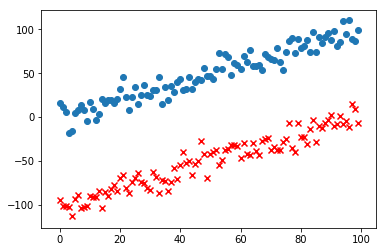

In [12]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [13]:
a = cvx.Variable(2)
b = cvx.Variable()

In [14]:
obj = cvx.Minimize(cvx.norm(a,2)/2)

In [15]:
x_constraints = [a.T * y.T[i] - b >=  1  for i in range(size)]
y_constraints = [a.T * x.T[i] - b <= -1 for i in range(size)]

constraints = x_constraints + y_constraints

In [16]:
prob = cvx.Problem(obj, constraints)
prob.solve()

0.026271849996648815

In [17]:
a.value

array([-0.03698816,  0.03731911])

In [18]:
b.value

array(1.76417536)

In [19]:
a = a.value
b = b.value

-112.99351956097266
110.30040347389146
-161.7001953037467
63.59163612946652


(0, 100)

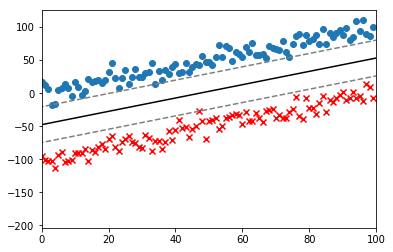

In [20]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])

d2_atD1min = (-a[1]*d1_min + b ) / a[0]
d2_atD1max = (-a[1]*d1_max + b ) / a[0]

print(d1_min)
print(d1_max)
print(d2_atD1min)
print(d2_atD1max)
plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')

sup_up_atD1min = (-a[1]*d1_min + b + 1 ) / a[0]
sup_up_atD1max = (-a[1]*d1_max + b + 1 ) / a[0]
sup_dn_atD1min = (-a[1]*d1_min + b - 1 ) / a[0]
sup_dn_atD1max = (-a[1]*d1_max + b - 1 ) / a[0]

plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')

plt.xlim([0, 100])

#### Nonlinearly Separable

In [21]:
size = 100
mult = 30
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

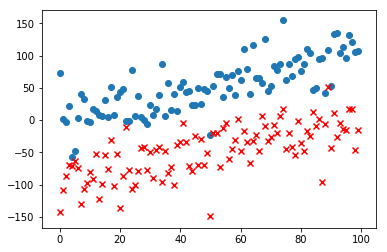

In [22]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [23]:
a = cvx.Variable(2)
b = cvx.Variable()

In [24]:
obj = cvx.Minimize(cvx.norm(a,2)/2)

In [25]:
x_constraints = [a.T * y.T[i] - b >=  1  for i in range(size)]
y_constraints = [a.T * x.T[i] - b <= -1 for i in range(size)]

constraints = x_constraints + y_constraints

In [26]:
prob = cvx.Problem(obj, constraints)
prob.solve()

inf

The problem is infeasible

#### Pareto Optimization

In [27]:
size = 100
mult = 30
r = np.random.normal(size=size)
x = np.array(range(size))
r *= mult
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= mult
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])

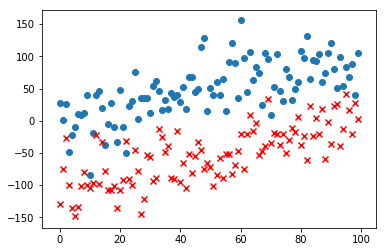

In [28]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

In [29]:
a = cvx.Variable(2)
b = cvx.Variable()
u = cvx.Variable(200)

In [30]:
alpha = 0.5
obj = cvx.Minimize(cvx.norm(a,2)/2 + alpha*np.ones(200)@u)

In [31]:
x_constraints = [a.T * y.T[i] - b + u[i]>=  1 for i in range(size)]
y_constraints = [a.T * x.T[i] - b - u[i + 100]<= -1 for i in range(size)]
u_constraints = [u[i] >= 0 for i in range(200)]

constraints = x_constraints + y_constraints + u_constraints

In [32]:
prob = cvx.Problem(obj, constraints)
prob.solve()

13.94687306276909

In [33]:
a.value

array([-0.06033148,  0.05566791])

In [34]:
b.value

array(2.78669228)

In [35]:
a = a.value
b = b.value

-147.28785583657998
155.99337290299803
-182.0923286881247
97.74553620405995


(0, 100)

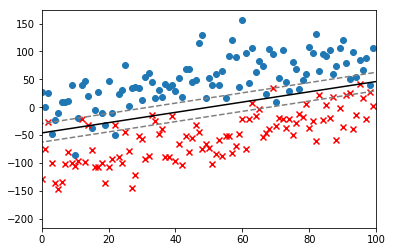

In [36]:
plt.scatter(range(size), r)
plt.scatter(range(size), r2, color='red', marker='x')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])

d2_atD1min = (-a[1]*d1_min + b ) / a[0]
d2_atD1max = (-a[1]*d1_max + b ) / a[0]

print(d1_min)
print(d1_max)
print(d2_atD1min)
print(d2_atD1max)
plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')

sup_up_atD1min = (-a[1]*d1_min + b + 1 ) / a[0]
sup_up_atD1max = (-a[1]*d1_max + b + 1 ) / a[0]
sup_dn_atD1min = (-a[1]*d1_min + b - 1 ) / a[0]
sup_dn_atD1max = (-a[1]*d1_max + b - 1 ) / a[0]

plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')

plt.xlim([0, 100])

In [37]:
l = np.linspace(0, 2, 99)

In [38]:
a = cvx.Variable(2)
b = cvx.Variable()
u = cvx.Variable(200)

x_constraints = [a.T * y.T[i] - b + u[i]>=  1 for i in range(size)]
y_constraints = [a.T * x.T[i] - b - u[i + 100]<= -1 for i in range(size)]
u_constraints = [u[i] >= 0 for i in range(200)]

constraints = x_constraints + y_constraints + u_constraints

In [39]:
term1 = []
term2 = []

for i, alpha in enumerate(l):
    obj = cvx.Minimize(cvx.norm(a,2)/2 + alpha*np.ones(200)@u)
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    term1.append(0.5*la.norm(a.value))
    term2.append(np.ones(200)@u.value)
    print(i, end='\r')

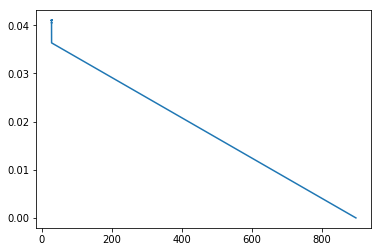

In [40]:
term1 = np.array(term1)
term2 = np.array(term2)
plt.plot(term2, term1)

## Dual
---

$$ \min \; \frac{1}{2}a^ta+\alpha1^tu$$

$$ subject\;to\;D(Xa-b1)\geq1-u$$

$$ L(a,b,u,\lambda,\sigma)=\frac{1}{2}a^ta+\alpha1^tu-\lambda^t(D(XA-b1)-1+u)-\sigma^tu$$

$$ L(a,b,u,\lambda,\sigma)=\frac{1}{2}a^ta+\alpha1^tu-\lambda^tDXa+\lambda^tDb1+\lambda^tD1+\lambda^tDu-\sigma^tu $$

$$ L(a,b,u,\lambda,\sigma)=\frac{1}{2}a^ta -\lambda^tDXa+\lambda^tDb1+(\alpha1^t-\lambda^t-\sigma^t)u+\lambda^t1 $$

$$\nabla L_a=0$$
$$a-X^tD\lambda=0$$
$$a=X^tD\lambda$$

$$\therefore$$

$$\nabla L_b=0$$
$$1^tD\lambda=0$$
$$\nabla L_u=0$$
$$\alpha1^t-\lambda^t-\sigma^t=0$$
$$\lambda^t+\sigma^t=\alpha1^t$$

However sigma is alpways $\gt 0$

$$\lambda^t\leq\alpha1^t$$

$$\max\;-\frac{1}{2}\lambda^tDXX^tD\lambda$$
$$1^tD\lambda=0$$
$$0\leq\lambda\leq\alpha1$$

In [41]:
z = np.ones(200)
z[100:] = -1*z[100:]
D = np.diag(z)

In [42]:
temp = np.ones([200,2])
temp[:100] = x.T
temp[100:] = y.T

In [43]:
G = -(np.dot(D,temp)@np.dot(temp.T,D))-0.000000001*np.identity(200)

In [44]:
x = cvx.Variable(200)
temp2 = np.ones(200).T@D
I = np.identity(200)

constraints_1 = [temp2*x == 0]
constraints_2 = [I*x <= 0.5]
constraints_3 = [I*x >= 0]

constraints = constraints_1 + constraints_2 + constraints_3

obj = cvx.Maximize(cvx.quad_form(x,G)+np.ones([1,200])*x)
prob = cvx.Problem(obj,constraints)
prob.is_qp()
prob.solve(verbose = True)

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 200, constraints m = 401
          nnz(P) + nnz(A) = 20700
settings: linear system solver = qdldl,
          eps_abs = 1.0e-04, eps_rel = 1.0e-04,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

objective    pri res    dua res    rho        time
   1  -9.0986e-02   2.14e-03   1.92e+00   1.00e-01   6.84e-03s
 200  -1.4048e+01   1.48e-02   1.68e-01   1.21e-03   1.34e-02s
 400  -1.4051e+01   1.25e-02   3.23e-02   1.21e-03   3.60e-02s
 600

13.995354502866832

There is a nonzero duality gap. The solution of the dual problem here acts as a lower bound to the primal problem $g^*\leq f^*$